# Preprocessing

In [137]:
# Needed libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Anova feat selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Decision Tree classifier
from sklearn import tree

#Tree Feature Selection 
from sklearn.ensemble import RandomForestClassifier 
# Import the RFE from sklearn library
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
# Import the RFE from sklearn library
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# Scaling
from sklearn.preprocessing import MinMaxScaler

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import cv

#Graphing
from collections import OrderedDict

# Loading Models

In [138]:
# Gives func get_anova_feat for anova selection
%run Models/getAnovaFeat.py


##############################################################
## All model files should return model for confusion matrix ##
##############################################################
# Gives func knn_pred for knn classifier
%run Models/knn.py

# Gives func decision_tree_pred for classifier
%run Models/dt.py

# Gives func ridge_reg_pred for classifier
%run Models/ridge.py

# Gives func rf_pred for classifier
%run Models/randForest.py

#Gives func for tree based feature selection 
%run Models/treeFeatureSelect.py

# Gives func for XGBoost
%run Models/XGBoost.py

# Data Preprocessing

In [139]:
# Importing both csvs and joining
df1 = pd.read_csv("Data/public-annotations.csv")
df2 = pd.read_csv("Data/features_YC.csv")
df = df1.join(df2)

# Dropping J- measurements for "junior"
df = df.drop(['S-A', 'S-B', 'S-C', 'S-D', 'S-E', 'S-F', 'J-A', 'J-B', 'J-C', 'J-D', 'J-E', 'J-F', 'J-Global'], axis = 1)
df = df.drop(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python'], axis = 1)

df = df.drop(['diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean'], axis = 1)
df = df.drop(['diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_VoxelNum'], axis = 1)
df = df.drop(['diagnostics_Mask-original_VolumeNum', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'], axis = 1)
df = df.drop(['ID'], axis = 1)

# Adding severity class 0, 1, 2
df['s_class'] = 0

for i in range(192):
    if df.iloc[i, 1] <= 6:
        df.iloc[i, 95] = 0
        continue
    elif df.iloc[i, 1] <= 12:
        df.iloc[i, 95] = 1
        continue
    else:
        df.iloc[i, 95] = 2
        
df_features = df.drop('filename', axis = 1)
df_features = df_features.drop('S-Global', axis = 1)

In [140]:
# Setting features and response
X = df_features.iloc[:, 0:93]
Y = df_features.iloc[:, 93:94]

# Splitting 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
y_train = np.ravel(y_train)

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns, index = X_train.index)

# Total of each class in train
print(sum(y_train == 0), sum(y_train == 1), sum(y_train == 2))

63 66 24


In [141]:
X_normalized.describe

<bound method NDFrame.describe of      original_firstorder_10Percentile  original_firstorder_90Percentile  \
8                            0.765517                          0.723577   
101                          0.531034                          0.691057   
89                           0.331034                          0.382114   
90                           0.234483                          0.609756   
118                          0.462069                          0.642276   
..                                ...                               ...   
103                          0.282759                          0.487805   
67                           0.489655                          0.414634   
117                          0.489655                          0.813008   
47                           0.103448                          0.065041   
172                          0.151724                          0.252033   

     original_firstorder_Energy  original_firstorder_Entropy  \
8

In [142]:
y_train

array([2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0],
      dtype=int64)

## Lasso Regression

In [143]:
# Declaring Lasso model
clf = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_scaled, y_train)
test_score = clf.score(X_scaled, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_scaled, y_train)

# evaluate model
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy on test data: %.3f || CV Accuracy: %.3f' % (test_score , mean(scores)))

Accuracy on test data: 0.686 || CV Accuracy: 0.530


In [144]:
# Declaring Lasso model
clf = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_normalized, y_train)
test_score = clf.score(X_normalized, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(penalty = 'l1', max_iter = 200, random_state=0,  solver='liblinear').fit(X_normalized, y_train)

# evaluate model
scores = cross_val_score(model, X_normalized, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy on test data: %.3f || CV Accuracy: %.3f' % (test_score , mean(scores)))

Accuracy on test data: 0.575 || CV Accuracy: 0.524


# Ridge regression 
### Feature Selection - ANOVA
**55 Features**

In [145]:
X_train_selected_ANOVA = get_anova_feat(55, X_normalized, y_train)

# ridge_reg_pred(X_train_selected_ANOVA, y_train)
model = ridge_reg_pred(X_train_selected_ANOVA, y_train)

Accuracy on test data: 0.673 || CV Accuracy: 0.549


In [146]:
y_pred = model.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[43, 18,  2],
       [16, 47,  3],
       [ 1, 10, 13]], dtype=int64)

**19 features (rule of ten)**

In [147]:
X_train_selected_ANOVA = get_anova_feat(19, X_normalized, y_train)

# Retrying Log Regression with ANOVA selected features                                                                       
model = ridge_reg_pred(X_train_selected_ANOVA, y_train)

Accuracy on test data: 0.614 || CV Accuracy: 0.564


In [148]:
model = ridge_reg_pred(X_normalized, y_train)

Accuracy on test data: 0.667 || CV Accuracy: 0.530


T:\Users\Luke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN
## Feature Selection - ANOVA
**55 Features**

In [149]:
# KNN 55 features K = 5
X_train_selected_ANOVA = get_anova_feat(55, X_normalized, y_train)

model = knn_pred(X_train_selected_ANOVA, y_train, 5)

Accuracy on test data: 0.627 || CV Accuracy: 0.443


In [150]:
y_pred = model.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[45, 18,  0],
       [24, 40,  2],
       [ 2, 11, 11]], dtype=int64)

**19 Features**

In [151]:
# KNN 19 Features K = 5
X_train_selected_ANOVA = get_anova_feat(19, X_normalized, y_train)

model = knn_pred(X_train_selected_ANOVA, y_train, 5)

Accuracy on test data: 0.601 || CV Accuracy: 0.437


In [152]:
y_pred = model.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[38, 22,  3],
       [21, 44,  1],
       [ 3, 11, 10]], dtype=int64)

# Decision Tree
## Feature Selection - ANOVA
**55 Features**

In [153]:
#Selecting features for the model 
X_train_selected_ANOVA = get_anova_feat(55, X_normalized, y_train)

# decision_tree_pred(X_train_selected_ANOVA, y_train)
model = decision_tree_pred(X_train_selected_ANOVA, y_train)

Accuracy on test data: 1.000 || CV Accuracy: 0.516


**19 Features**

In [154]:
#Selecting features for the model 
X_train_selected_ANOVA = get_anova_feat(19, X_normalized, y_train)

# decision_tree_pred(X_train_selected_ANOVA, y_train)
model = decision_tree_pred(X_train_selected_ANOVA, y_train)

Accuracy on test data: 1.000 || CV Accuracy: 0.491


#  Tree Based Feature Selection


Accuracy of full random forest on train data: 1.000 || CV Accuracy: 0.465


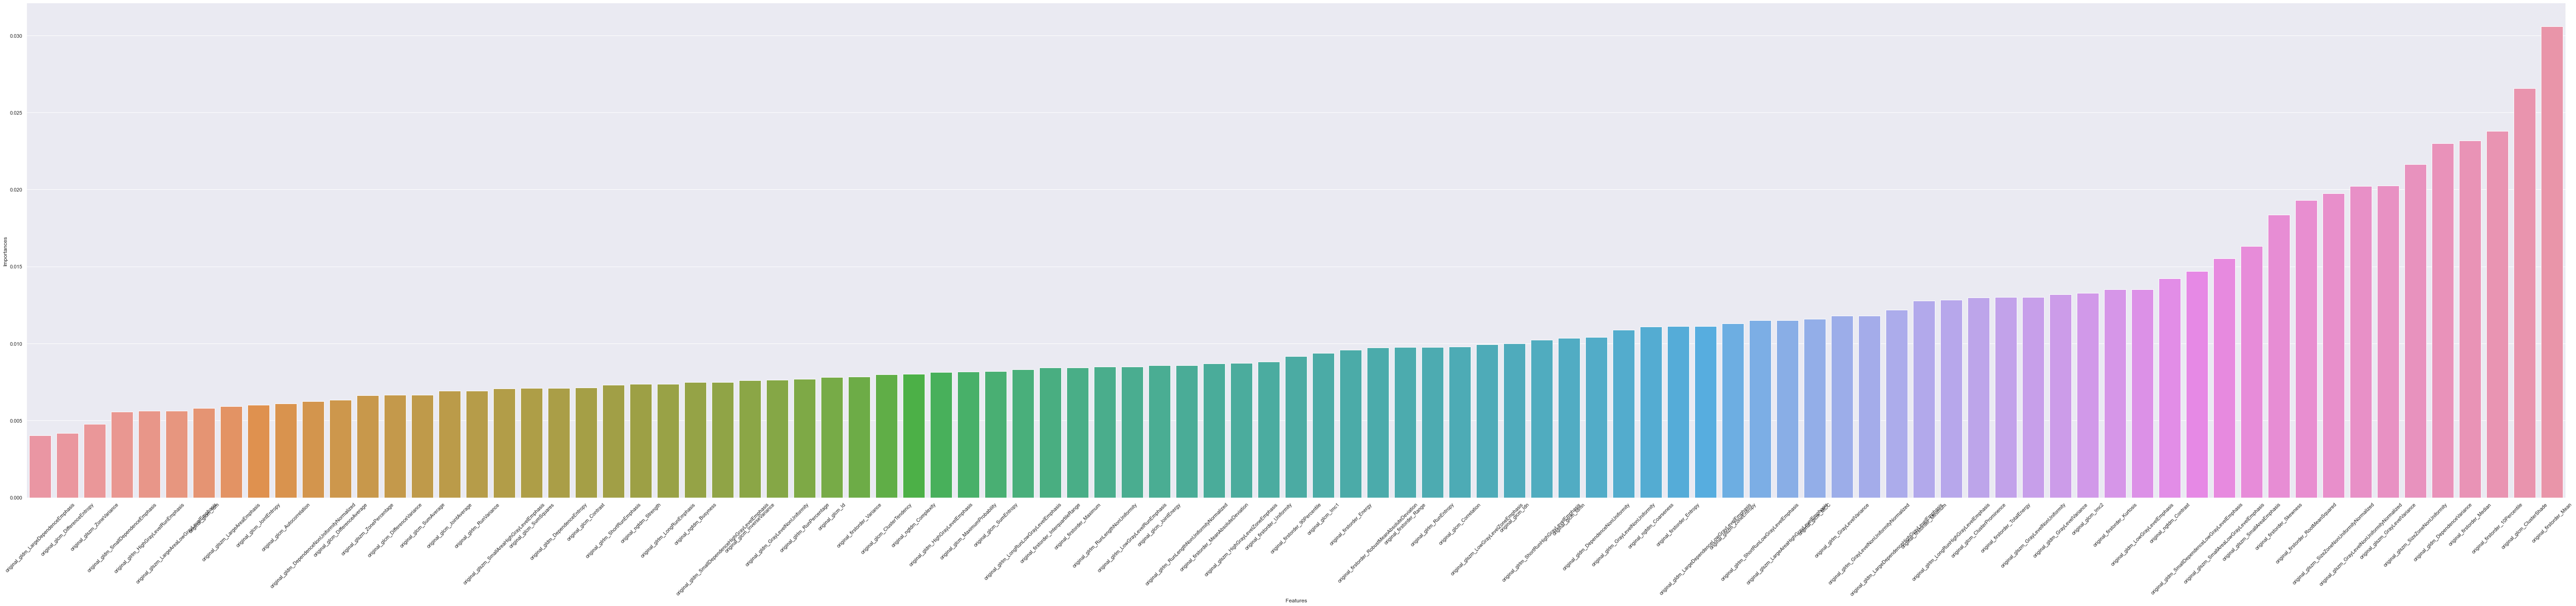

In [155]:
full_tree = rand_forest(X_normalized, y_train, X, max_depth= None, n_estimators = 125)

In [156]:
full_tree.oob_score_

0.45751633986928103

In [157]:
featureSelectedTree = treeFeatureSelection(X_normalized, y_train, 6, n_estimators = 150)

Accuracy of feature selected random forest on train data: 1.000 || OOB Accuracy: 0.444


In [158]:
for i in range(8,13):
    for j in range (4,8):
        print(str(i) + " Features, " + str(j) + " Max Depth")
        featureSelectedTree = treeFeatureSelection(X_normalized, y_train, i, j)

8 Features, 4 Max Depth
Accuracy of feature selected random forest on train data: 0.830 || OOB Accuracy: 0.451
8 Features, 5 Max Depth
Accuracy of feature selected random forest on train data: 0.928 || OOB Accuracy: 0.451
8 Features, 6 Max Depth
Accuracy of feature selected random forest on train data: 0.961 || OOB Accuracy: 0.444
8 Features, 7 Max Depth
Accuracy of feature selected random forest on train data: 0.993 || OOB Accuracy: 0.425
9 Features, 4 Max Depth
Accuracy of feature selected random forest on train data: 0.869 || OOB Accuracy: 0.451
9 Features, 5 Max Depth
Accuracy of feature selected random forest on train data: 0.908 || OOB Accuracy: 0.451
9 Features, 6 Max Depth
Accuracy of feature selected random forest on train data: 0.941 || OOB Accuracy: 0.444
9 Features, 7 Max Depth
Accuracy of feature selected random forest on train data: 0.993 || OOB Accuracy: 0.425
10 Features, 4 Max Depth
Accuracy of feature selected random forest on train data: 0.850 || OOB Accuracy: 0.451


# PCA

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(X_normalized)

In [160]:
principalComponents

array([[-2.32620061e+00, -9.85500501e-01,  5.16137116e-01, ...,
         7.97244643e-02, -2.25589320e-01,  1.13311142e-01],
       [ 1.93032703e-01, -4.94020420e-01,  6.27997352e-01, ...,
        -1.16040742e-02,  5.20078668e-03, -5.67902347e-02],
       [-7.67703785e-01,  8.37463526e-02, -4.73448293e-01, ...,
        -1.99748238e-02, -2.74969355e-02,  3.65302868e-02],
       ...,
       [ 7.97613126e-01, -7.46580719e-01,  4.78472214e-02, ...,
        -1.98446244e-03,  5.22432636e-02, -5.82764980e-02],
       [-1.21048368e+00,  1.15001739e+00, -6.82614077e-01, ...,
        -1.50870407e-01,  2.68665967e-02,  9.15546983e-03],
       [-5.38395923e-02,  4.46037047e-01, -9.20800489e-01, ...,
        -3.74910793e-02,  7.13400776e-02,  9.28982435e-02]])

In [161]:
featureSelectedTree = treeFeatureSelection(principalComponents, y_train, 6, 5)

Accuracy of feature selected random forest on train data: 0.928 || OOB Accuracy: 0.536


# XGBOOST

In [162]:
# XGBoost - 55 Features
X_train_selected_ANOVA = get_anova_feat(55, X_normalized, y_train)


model = xgboost_pred(X_train_selected_ANOVA, y_train)
y_pred = model.predict(X_train_selected_ANOVA)


Accuracy on test data: 1.000 || CV Accuracy: 0.563


In [163]:
# XGBoost - 55 Features
X_train_selected_ANOVA = get_anova_feat(15, X_normalized, y_train)


model = xgboost_pred(X_train_selected_ANOVA, y_train)
y_pred = model.predict(X_train_selected_ANOVA)


Accuracy on test data: 1.000 || CV Accuracy: 0.555


In [164]:
# XGBoost - PCA
model = xgboost_pred(principalComponents, y_train)
y_pred = model.predict(principalComponents)


Accuracy on test data: 1.000 || CV Accuracy: 0.562


# Graphing RF Results

In [165]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=0,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=0,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=0,
        ),
    ),
]

In [166]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

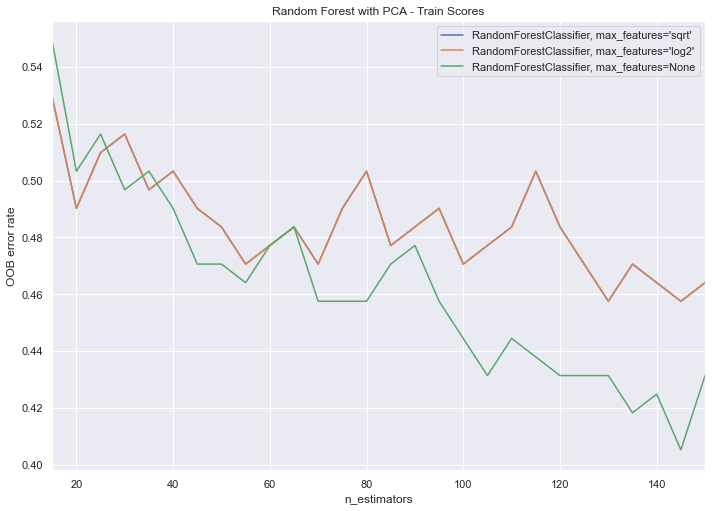

In [167]:
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(principalComponents, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.title("Random Forest with PCA - Train Scores")
plt.show()

In [168]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=0,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=0,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=0,
        ),
    ),
]

<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This

T:\Users\Luke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(principalComponents_t, Y)
<ipython-input-169-bb9a9d5d653d>:14: DataConversionWarning: A column-vector y was passed

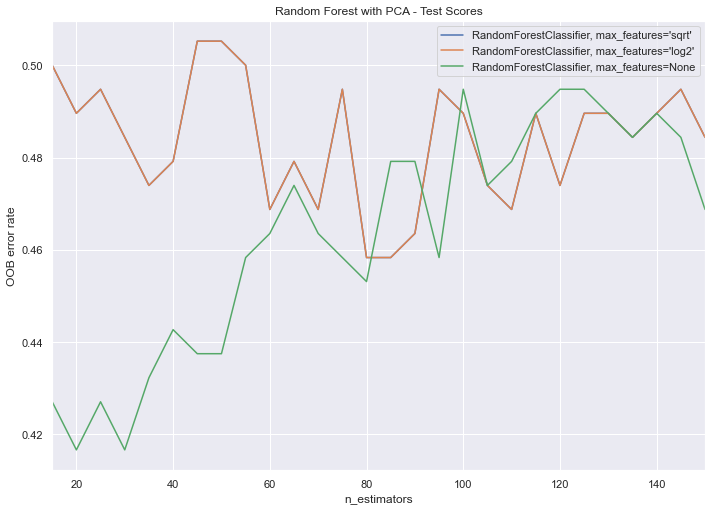

In [169]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

X_total_normalized = pd.DataFrame(scaler.fit_transform(X), columns= X.columns, index = X.index)

pca = PCA(n_components=18)
principalComponents_t = pca.fit_transform(X_total_normalized)

min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(principalComponents_t, Y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.title("Random Forest with PCA - Test Scores")
plt.show()